# Amazon Sales Analysis

# Objective
**This project involves analyzing Amazon product data to understand pricing, ratings, and discount patterns. Through data cleaning, visualization, and insight generation, it provides strategic recommendations to improve product visibility, optimize pricing, and increase sales.**

**Import libraries**

In [39]:
pip install plotly-express

In [40]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd # used for data manipulation and data loading

import numpy as np # used numerical calculation

import matplotlib.pyplot as plt # used for visualization
%matplotlib inline

import seaborn as sns # advanced visulization

import plotly.express as px # designed for creating interactive visualizations with minimal code

from ydata_profiling import ProfileReport

**Load the dataset.**

In [103]:
df=pd.read_csv("C:\\Users\\Abc\\Desktop\\amazon.csv") # load the data set

**1.head()**: To get first rows in dataset.

In [105]:
df.head() # get first 5 rows

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**2.tail()** : To get last rows in dataset.

In [107]:
df.tail() # to get last 5 rows

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


**3.info()** : To get information about data.(i.e Null value,dtype)

In [109]:
df.info() # to get information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**4.to_numeric** : This method is used to convert a Series or column of data to a numeric data type. This is particularly useful when working with data that may be stored as strings or objects but actually represents numeric values.

In [137]:
# replace the '₹' to , 
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '')

In [141]:
# replace the  |  and convert the numerical column to rating
df['rating'] = df['rating'].astype(str).str.replace('|', '', regex=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [143]:
# replace the % and convert to numeric column
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

In [147]:
# Convert numerical columns  according to there datatype

# to convert the discounted price object to numerical column 
df['discounted_price'] = pd.to_numeric(df['discounted_price'])  # errors=coerce is convert forcefully

#  to convert the actual price object to numerical column 
df['actual_price'] = pd.to_numeric(df['actual_price'])




# # to convert the rating count object to numerical column 
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

**5.dtype** : To check data types of each column.

In [149]:
df.dtypes # to check data types

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

**6.isnull()** : To check the missing values in each column.

In [151]:
df.isnull().sum() # to check missing values

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

- There are 1 missing value in 'rating' and 2 missing value in 'rating count'.

**7.fillna()** : Fill missing values.

In [153]:



# fill missing values in rating by median
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].mean())


#Fill missing  values in ratings with median 
df['rating'] = df['rating'].fillna(df['rating'].mean())


In [155]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

- There is no missing values are present.

**8.duplicated()** : To return total number of duplicate value.

In [161]:
df.duplicated().sum() # to get count of duplicated values

0

- There are no duplicates values  in dataset.

**9.describe()** : To get sumamry of numerical column.

In [166]:
df.describe() # to get summary of numerical column

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291574,42724.651512
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17394.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


**1.discounted_price**
- count : The count of discountd_price is 1465. there is no missing values are present.
- mean : The average (mean) discounted price column is 3125.31 i.e average around 3125.
- std : The standard deviation is 6944.30 is greater than mean.
- min : The lowest discounted price is 39 .
- max : The highest discounted 77990.
- 25 % (Q1): The 25 % value is 325 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 799.
- 75 % (Q3) : 75 % of the 1999 is gerater than median and Q1.

**2.actual_price**
- count : The count of actual price is 1465. thereis no missing value are present.
- mean : The average (mean) actual  price column is 5444.90 i.e average around 5444.
- std : The standard deviation is 10874.82 is greater than mean.
- min : The minimum actual price is 39 .
- max : The maximum price is 139900.
- 25 % (Q1): The 25 % value is 800 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 1650.
- 75 % (Q3) : 75 % of the 4295 is less than median and Q1.

**3.discount_percentage**
- count : The count of this is 1465 thereis no missing value are present.
- mean : The average (mean) discount percentage column is 47.69 i.e average around 47.
- std : The standard deviation is 21.96 is less than mean.
- min : The minimum percentage is 0 . i.e no lowest discount percentage is present.
- max : The maximum percentage is 94.
- 25 % (Q1): The 25 % value is 32 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 50.
- 75 % (Q3) : 75 % of the 63 is greater than median and Q1.

**4.rating**
- count : The count of this is 1465 thereis no missing value are present.
- mean : The average (mean) rating column is 4.09 i.e average around 4.
- std : The standard deviation is 0.29 is less than mean.
- min : The minimum rating is 2.
- max : The maximum rating is 5.
- 25 % (Q1): The 25 % value is 4 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 4.
- 75 % (Q3) : 75 % of the 4 is equal to the median and Q1.

**5.rating_count**
- count : The count of this is 1465 thereis no missing value are present.
- mean : The average (mean) rating count column is 18295.54 i.e average around 18295.
- std : The standard deviation is 42724.65 is greater than mean.
- min : The minimum rating count is 2.
- max : The maximum rating count  is 426973 .
- 25 % (Q1): The 25 % value is 1191 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 5179.
- 75 % (Q3) : 75 % of the 17394 is greater than  median and Q1.

**10.nunique()** : To find unique values.

In [170]:
df.nunique().sum() # it return all unique values in dataset

15318

- There is 15318 unique values is present in dataset.

In [173]:
df.shape

(1465, 16)

- There are 1465 rows and 16 columns are present.

In [178]:
df.nunique() # to get unique vqlues in each column

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   26
rating_count           1144
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

In [182]:
df['category'].nunique()

211

- In category column there are 211 unique categories are present.

In [199]:
# shows the unique value in 
df['product_name'].unique()

array(['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)',
       'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)',
       'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices',
       ...,
       'Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)',
       'Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)',
       'Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)'],
      dtype=object)

In [201]:
df.columns # display column name

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [203]:
df.drop(['product_id','user_id','review_id','product_link','img_link'],axis=1,inplace=True) # remove unecessary column

In [205]:
# check the duplicates in category column
df['category'].duplicated().sum()

1254

- There are 1254 duplicates values are present.

In [208]:
# Rows with duplicate category name
df[df['category'].isin(df['category'][df['category'].duplicated()])].sort_values('category')

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,294.0,4999.0,94.0,4.3,4426.0,【WIDER COMPATIBILITY】This USB C Female to USB ...,"Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...
742,Kanget [2 Pack] Type C Female to USB A Male Ch...,Computers&Accessories|Accessories&Peripherals|...,149.0,399.0,63.0,4.0,1540.0,👍【USB C TO USB ADAPTER】-This is a USB C FEMALE...,"Abhi_K,Amazon Customer,Swap,shivam,Abhinav Sin...","Good and does it’s work,Nice product working a...",Using it to connect my type C Plantronic headp...
748,JBL Commercial CSLM20B Auxiliary Omnidirection...,Computers&Accessories|Accessories&Peripherals|...,949.0,2000.0,53.0,3.9,14969.0,Omnidirectional pickup pattern|3.5mm TRRS jack...,"Ansh KaTariA,Saqlain Shaikh,Sardar V.,Rushikes...","It's just good !,Good for WFH,Works according ...",It just good for beginners you can start your ...
772,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,Computers&Accessories|Accessories&Peripherals|...,199.0,499.0,60.0,3.3,2804.0,SOUND RECORDING: With the Miracle Sound Microp...,"Afrina Hasnat,BKBasu,Ayush Raghuvanshi,Wilfrie...","No TRRS to TRS converter in the box,Not suitab...",This mic's sound quality is very good but if y...
936,ZEBRONICS Zeb-Warrior II 10 watts 2.0 Multimed...,Computers&Accessories|Accessories&Peripherals|...,649.0,1300.0,50.0,4.1,5195.0,Warrior II is an 2.0 USB Powered Speaker. Note...,"Pranav,D Joardar,Roy,Puneet,Gokul,Nachiket,Pra...",A beautiful experience in your budget. The vol...,The sound quality at this price is unbelievabl...
...,...,...,...,...,...,...,...,...,...,...,...
765,Parker Classic Gold Gold Trim Ball Pen,OfficeProducts|OfficePaperProducts|Paper|Stati...,480.0,600.0,20.0,4.3,5719.0,Parker Classic Gold GT has a tungsten carbide ...,"Diksha Wankhede,Sam,Shafi Nagani,Unified Excel...","So good ,nice looking,Value for money and a ni...","Easy to hold and to good in this price,The qua..."
858,Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...,OfficeProducts|OfficePaperProducts|Paper|Stati...,178.0,210.0,15.0,4.3,2450.0,Unique 3 dimple tip technology from Japan for ...,"Madhusmita singh,Sandeep Singh,Jay OG,Asim,Vik...","It's good,Good,One of the few items on amazon ...",Everything is fine but it's bit dark and stick...
919,Parker Vector Standard Chrome Trim Ball Pen (I...,OfficeProducts|OfficePaperProducts|Paper|Stati...,272.0,320.0,15.0,4.0,3686.0,A solid plastic body of the glossy black desig...,"Fardeen mujawar,Pavan,Danny,Siddhartha Pratap,...","Ok,Like all other ball pens,Regular pen over p...","Can buy but only when price is less,It's not t..."
850,"Pentonic Multicolor Ball Point Pen, Pack of 10",OfficeProducts|OfficePaperProducts|Paper|Stati...,120.0,120.0,0.0,4.1,4308.0,"0.7 mm tip size|Black Body, Multicolor Ink(Bla...","Parul S.,Prateek Tiwari,kateriki,golla ramesh,...","Average,I like the 'Pentonic' pens,which is wh...","It's good, but they give 2 different shades of..."


In [210]:
df[df['rating'] ==4.3] # This shows the record whose rating is 4.3

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content
7,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.0,299.0,23.0,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,"Pavan A H,Jayesh bagad,Shridhar,rajendran,karu...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......
10,Portronics Konnect L POR-1081 Fast Charging 3A...,Computers&Accessories|Accessories&Peripherals|...,154.0,339.0,55.0,4.3,13391.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"Tanya,Anu,Akshay,Vishal Sagara Shetty,Swatilek...",Good for fast charge but not for data transfer...,The cable is efficient in fast charging but in...
19,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,21990.0,39.0,4.3,11976.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"NIRMAL.N,Manoj kumar,SOMNATH DAS,Harsha,Pradhu...","Sound quality,Very nice,Value for money,Good,G...","LG was always Good , correct delivery, good se..."
22,Samsung 80 cm (32 Inches) Wondertainment Serie...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,22900.0,41.0,4.3,16299.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"Rahman Ali,MARIYA DASS,Md Aftab,roshan s.,Moha...","Good,Sound is very low another brand comparing...","Overall good.,TV picture ok smart betterSound ..."
24,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...
...,...,...,...,...,...,...,...,...,...,...,...
1421,Lint Remover For Clothes With 1 Year Warranty ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",445.0,999.0,55.0,4.3,229.0,Our Lint Remover for Clothes MAKE ALL FABRICS ...,"rahul,Kranti,Namrata Tokas,Farhana,Sudhir Pras...","Lint remover,So nice but takes longer then exp...",Work perfectly and amazingly.Must buy for clot...
1432,AGARO Royal Stand 1000W Mixer with 5L SS Bowl ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,5999.0,11495.0,48.0,4.3,534.0,1W Motor with 1% copper winding which multi fu...,"Sunil ashat,Amazon Customer,sandeep agarwal,Al...","Happy that I chose this,Good product,Easy usag...",Really happy that I chose this for my Mom. Mad...
1444,Eureka Forbes Euroclean Paper Vacuum Cleaner D...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",253.0,500.0,49.0,4.3,2664.0,Special Anti-Microbial(Biocide Treated) Paper ...,"Lulzdrone,KRISH,Harsh Shah,Harsh,HaPa,Inderjee...","Bigger size,Superb.,Vacuum Bag,Price is reason...",These are the biggest one their models use and...
1447,Syska SDI-07 1000 W Stellar with Golden Americ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",457.0,799.0,43.0,4.3,1868.0,"Golden American Heritage Soleplate,Overheat Sa...","Sandip Biswas,Jatin Solanki,Javid rehman raina...","All fine but the cord is too short,Good qualit...","Cord is too short,Good quality in this price r..."


In [212]:
df.sort_values(by="actual_price",ascending=False) # sort the actual price by ascending order

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,44.0,4.7,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...",Product installation was excellent but delive...,The delivery people were not careful with the ...
255,VU 164 cm (65 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",54990.0,85000.0,35.0,4.3,3587.0,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"UtdBuzz,Mukund Nagvenkar,S.R K.,Pruthvi Raj Goud",Good TV for the price. (But my experience was ...,",Screen quality is good.It's been a month I bo..."
283,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,"Electronics|HomeTheater,TV&Video|Televisions|S...",47990.0,79990.0,40.0,4.3,1376.0,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"Raj Mohammed,Samson,Haroon sayeed,P Imran Khan...","Love Amazon but lg is misleading,Amazing produ...",There's no magic remote and lg should include ...
1354,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"Home&Kitchen|Heating,Cooling&AirQuality|AirCon...",42990.0,75990.0,43.0,4.3,3231.0,Split AC with inverter compressor: variable sp...,"ABHISHEK KUMAR,Nageswar,Denzil,krushna,Brijesh...","Very nice,Efficient but little costly.,Good pr...","Very nice,Efficiency is good , cost is little ..."
568,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics|Mobiles&Accessories|Smartphones&Ba...,37990.0,74999.0,49.0,4.2,27790.0,5G Ready powered by Qualcomm Snapdragon 865 Oc...,"Mohammed Suhail,GVR","WORTH BUY ! THE BEST,Good for the price.",It's been 15 days since i using the device ext...
...,...,...,...,...,...,...,...,...,...,...,...
811,Classmate Pulse Spiral Notebook - 240 mm x 180...,OfficeProducts|OfficePaperProducts|Paper|Stati...,67.0,75.0,11.0,4.1,1269.0,The cover design of the notebook is subject to...,"Nafisa Nehar,Narinder K.,Mayank,Harsh Raj,Dr.G...","it's nice. simple and easy.,It's good but I or...",I liked because it was aesthetically pleasing....
710,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59.0,59.0,0.0,3.8,5958.0,"Portable, easy to use|LED lights for maximum i...","Ravi Kumar s/o Devraj,anil-kumar,Soumith,Drew ...","Good,Product as described,Good for the price,V...","Good,Product is as described, good we can use ..."
616,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,50.0,50.0,0.0,4.3,5792.0,5 vibrant Neon body color|Smooth and fast writ...,"Gatij saini,Biswajit Kundu,Altaf Khan,Agam Sar...","Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho..."
997,Inventis 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.0,39.0,0.0,3.6,13572.0,The side the LED light falls on will depend on...,"Dhruv Sharma,Durairaj B,Ved Katyayan,Shailendr...","it worked properly for almost one year,ok,USB ...","very good product, very bright, easy to use, i..."


In [216]:
# show the values whose discount percentage  is 0
df[(df['discount_percentage']== 0) ]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content
33,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,599.0,599.0,0.0,4.3,355.0,USB Type-C to Type-C cable with universal comp...,"Verified Buyer,Avishek Majumdar,Drowna roy,mah...","Good,Genuine product,Not first charge this cab...","Buy it,Received in good condition and is worki..."
138,LRIPL Compatible Sony Bravia LCD/led Remote Wo...,"Electronics|HomeTheater,TV&Video|Accessories|R...",399.0,399.0,0.0,3.9,1951.0,Before Order Please Match Your Remote With Ima...,"Vishal Nagpal,sharmila,Amazon Customer,Ashish ...","Works like Charm,Useful,Good,Very nice,Doesn't...",The remote looks very similar to the original ...
264,Realme Smart TV Stick 4K,Electronics|HomeAudio|MediaStreamingDevices|St...,4699.0,4699.0,0.0,4.5,224.0,Type: HDMI|Power Requirement: DC 5 V|Number of...,"Sayan Dutta,Harish,Saurabh Majumdar,Ajay Kumar...","Great Product,Very good and working very nice,...","Everything is great. I love this.,Very good an..."
321,Mi 80 cm (32 inches) HD Ready Android Smart LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,14999.0,0.0,4.3,27508.0,Resolution: HD Ready Android TV (1366x768) | R...,"MUNIYANDI. D,Rathod Ganesh.,Pankaj,Arulkumar M...","Nice tv,Good product,Average,No operation butt...","Good quality,Good product,Average,No operation..."
339,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Electronics|Mobiles&Accessories|Smartphones&Ba...,28999.0,28999.0,0.0,4.3,17415.0,Camera: 50MP Main Camera with Sony IMX766 and ...,"ASR,Amazon user,Rama Rao,Vinay,ANIKET,NAGA SHA...","Really a Good Buy in this price range in 2022,...",Verdict : A Solid buy for this price segment i...
340,"OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...",Electronics|Mobiles&Accessories|Smartphones&Ba...,28999.0,28999.0,0.0,4.3,17415.0,Camera: 50MP Main Camera with Sony IMX766 and ...,"ASR,Amazon user,Rama Rao,Vinay,ANIKET,NAGA SHA...","Really a Good Buy in this price range in 2022,...",Verdict : A Solid buy for this price segment i...
406,"OnePlus Nord 2T 5G (Jade Fog, 12GB RAM, 256GB ...",Electronics|Mobiles&Accessories|Smartphones&Ba...,33999.0,33999.0,0.0,4.3,17415.0,Camera: 50MP Main Camera with Sony IMX766 and ...,"ASR,Amazon user,Rama Rao,Vinay,ANIKET,NAGA SHA...","Really a Good Buy in this price range in 2022,...",Verdict : A Solid buy for this price segment i...
466,Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired ...,"Electronics|Headphones,Earbuds&Accessories|Hea...",499.0,499.0,0.0,4.2,31539.0,In Ear Volume Control|Design: Canal phone|Head...,"Ranit Barman,Ravi Singh,Karan Rai,Amazon Custo...","Works well, but not for long,Good product,Good...","The sound quality is excellent for the price, ..."
539,"LIRAMARK Webcam Cover Slide, Ultra Thin Laptop...",Computers&Accessories|Accessories&Peripherals|...,149.0,149.0,0.0,4.3,10833.0,Cool Gadget: Protection against possible video...,"Vishal Bhardwaj,Parvathi M.K,swaraj,Simi","Merges with the device, Ultra Thin, Smooth Sli...",PRODUCTLIRAMARK Webcam Cover SlideEVENTS DATES...
616,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,50.0,50.0,0.0,4.3,5792.0,5 vibrant Neon body color|Smooth and fast writ...,"Gatij saini,Biswajit Kundu,Altaf Khan,Agam Sar...","Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho..."


In [220]:
# dropping the rows whose discount percentage is 0
df=df.drop(df[(df['discount_percentage'] == 0)].index) 

In [222]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,3136.998891,5536.949350,49.341808,4.091594,18611.728166
std,6925.114901,10962.306134,20.070733,0.292896,43391.308475
min,39.000000,75.000000,2.000000,2.000000,2.000000
25%,329.000000,899.000000,35.000000,4.000000,1152.500000
50%,838.495000,1722.500000,50.000000,4.100000,5179.000000
75%,2027.000000,4499.000000,64.000000,4.300000,17815.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


**1.discounted_price**
- count : The count of discountd_price is 1416. there is no missing values are present.
- mean : The average (mean) discounted price column is 3136.99 i.e average around 3136.
- std : The standard deviation is 6925.11 is greater than mean.
- min : The lowest discounted price is 39 .
- max : The highest discounted 77990.
- 25 % (Q1): The 25 % value is 329 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 838.
- 75 % (Q3) : 75 % of the 2027 is gerater than median and Q1.

**2.actual_price**
count : The count of actual price is 1416. there is no missing value are present.
mean : The average (mean) actual price column is 5536.94 i.e average around 5536.
std : The standard deviation is 10962 is greater than mean.
min : The minimum actual price is 75 .
max : The maximum price is 139900.
25 % (Q1): The 25 % value is 899 that show the values below the 25 % of the data fall.
50 % (median): The middle value of this column is 1722.
75 % (Q3) : 75 % of the 4499 is less than Q1 and greater than mean.

**3.discount_percentage**
- count : The count of this is 1416 thereis no missing value are present.
- mean : The average (mean) discount percentage column is 49.34 i.e average around 49.
- std : The standard deviation is 20 is less than mean.
- min : The minimum percentage is 2.
- max : The maximum percentage is 94.
- 25 % (Q1): The 25 % value is 35 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 50.
- 75 % (Q3) : 75 % of the 64 is greater than median and Q1.

**4.rating**
- count : The count of this is 1416 thereis no missing value are present.
- mean : The average (mean) rating column is 4.09 i.e average around 4.
- std : The standard deviation is 0.29 is less than mean.
- min : The minimum rating is 2.
- max : The maximum rating is 5.
- 25 % (Q1): The 25 % value is 4 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 4.
- 75 % (Q3) : 75 % of the 4 is equal to the median and Q1.

**5.rating_count**
- count : The count of this is 1416 thereis no missing value are present.
- mean : The average (mean) rating count column is 18611.72 i.e average around 18611.
- std : The standard deviation is 43391 is greater than mean.
- min : The minimum rating count is 2.
- max : The maximum rating count is 426973 .
- 25 % (Q1): The 25 % value is 1152 that show the values below the 25 % of the data fall.
- 50 % (median): The middle value of this column is 5179.
- 75 % (Q3) : 75 % of the 17815 is greater than median and Q1.

In [225]:
# Adding final_price column in datset
df['final_price']=df['actual_price'] - df['discounted_price'] # to subtract the actual price - discounted  price 
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content,final_price
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,700.0
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,150.0
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",1700.0
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",370.0
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",245.0


# EDA (Explorotory Data Analysis)
- EDA is essential because it helps you understand your data before applying any models, visualizations, or business decisions.

# Types of EDA

# **1.Univariate Analysis**
- Analyzing and comparing a single feature(column) within itself.

# **2.Bivariate Analysis**
- Analyzing and comparing a two features in order to find there relationship,underlying pattern and trends between them .

# **3.Multivariate Analysis**
- Analyzing and comparing more than two feature in order to find the relationship,trends,dependncies between them.

In [273]:
df.to_csv("AMAZON.csv",index=False) # to saving dataframe to csv file index=False it contain only actual data without extra index column.

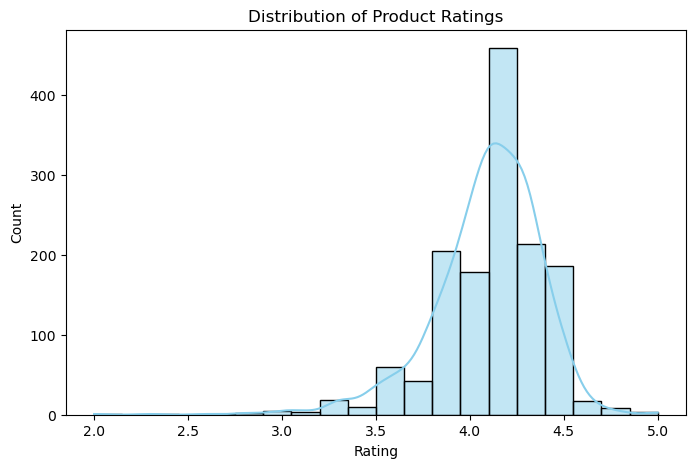

In [275]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- The x-axis represents the product ratings, ranging from 2.0 to 5.0.
- The y-axis represents the count of products with corresponding ratings.
- The histogram shows a skewed distribution, with most products having ratings between 4.0 and 4.5.
- The highest frequency is observed at a rating of approximately 4.1, with a count of around 400 products.
- The distribution is not perfectly normal, as it is slightly skewed to the left.

<Figure size 800x500 with 0 Axes>

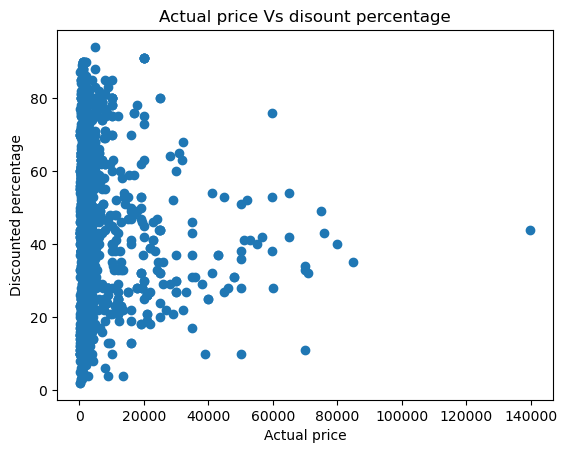

In [282]:
plt.figure()
plt.scatter(df['actual_price'],df['discount_percentage'])
plt.title("Actual price Vs disount percentage")
plt.xlabel('Actual price')
plt.ylabel('Discounted percentage')
plt.show()

- The data points are densely clustered at lower actual prices (below 20,000) and higher discounted percentages (above 60%).
- As the actual price increases, the discounted percentage tends to decrease.
- There is a negative correlation between the actual price and the discounted percentage.

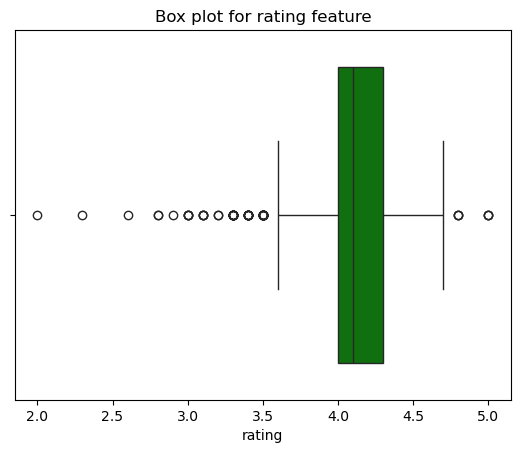

In [377]:
# box plot rating column
plt.figure()
sns.boxplot(x=df['rating'],color='green')
plt.title("Box plot for rating feature")
plt.show()

- The data points are concentrated between approximately 4.2 and 4.7.
- The presence of outliers on the lower end of the rating scale (between 2.0 and 3.5) indicates that there are some instances where the feature received lower ratings.


<Figure size 1000x800 with 0 Axes>

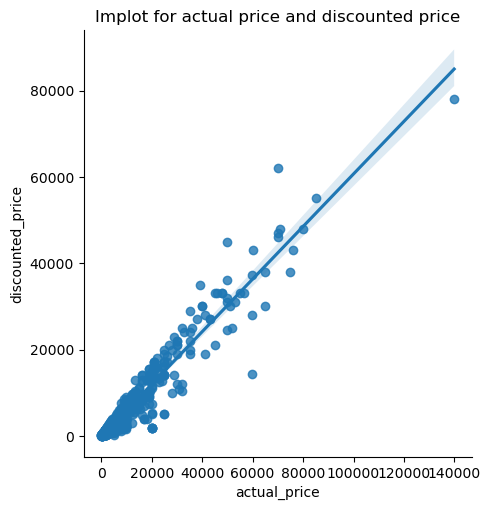

In [384]:
# Implot
plt.figure(figsize=(10,8))
sns.lmplot(data=df, x="actual_price", y="discounted_price")
plt.title('Implot for actual price and discounted price')
plt.show()

- The x-axis represents the actual price, ranging from 0 to 140,000.
- The y-axis represents the discounted price, spanning from 0 to 80,000.
- The data points are scattered around the regression line, with some variation in the discounted prices for a given actual price.
- From 0 to 40000 in that points clusters are formed.                                                                                                       

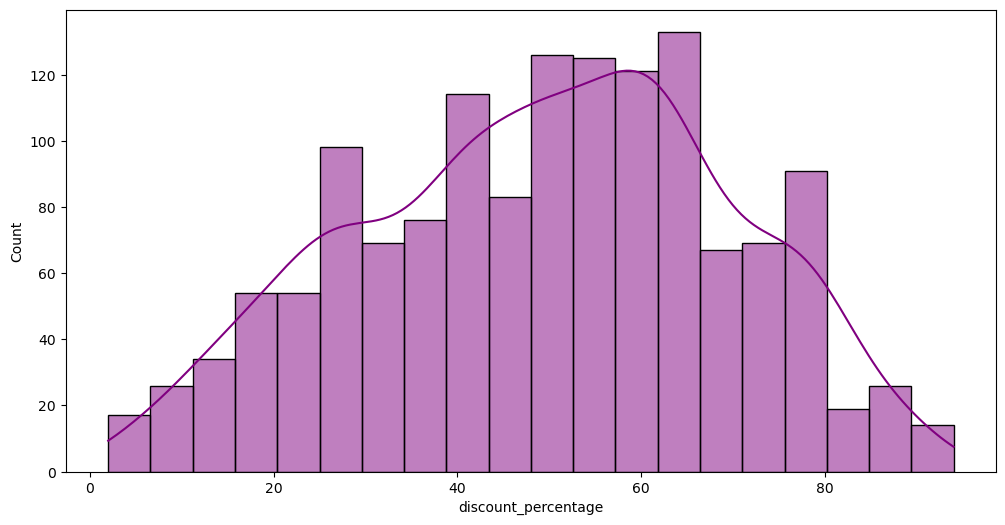

In [401]:
# histogram for discount percentage
plt.figure(figsize=(12,6))
sns.histplot(df['discount_percentage'],bins=20,kde=True,color='purple')
plt.show()

- The x-axis represents the discount percentage, ranging from 0 to 80.
- The y-axis represents the count of data points, ranging from 0 to 120.
- The histogram is skewed to the right, indicating that most data points have a discount percentage between 20 and 60.
- The highest frequency is observed at a discount percentage of around 50-60, with a count of approximately 110

In [313]:
max_rate = df.sort_values(by=['rating'], ascending=False).head(5)# maximum rate
max_rate_count=df.sort_values(by=['rating_count'],ascending=False).head(5) # maximum rating count

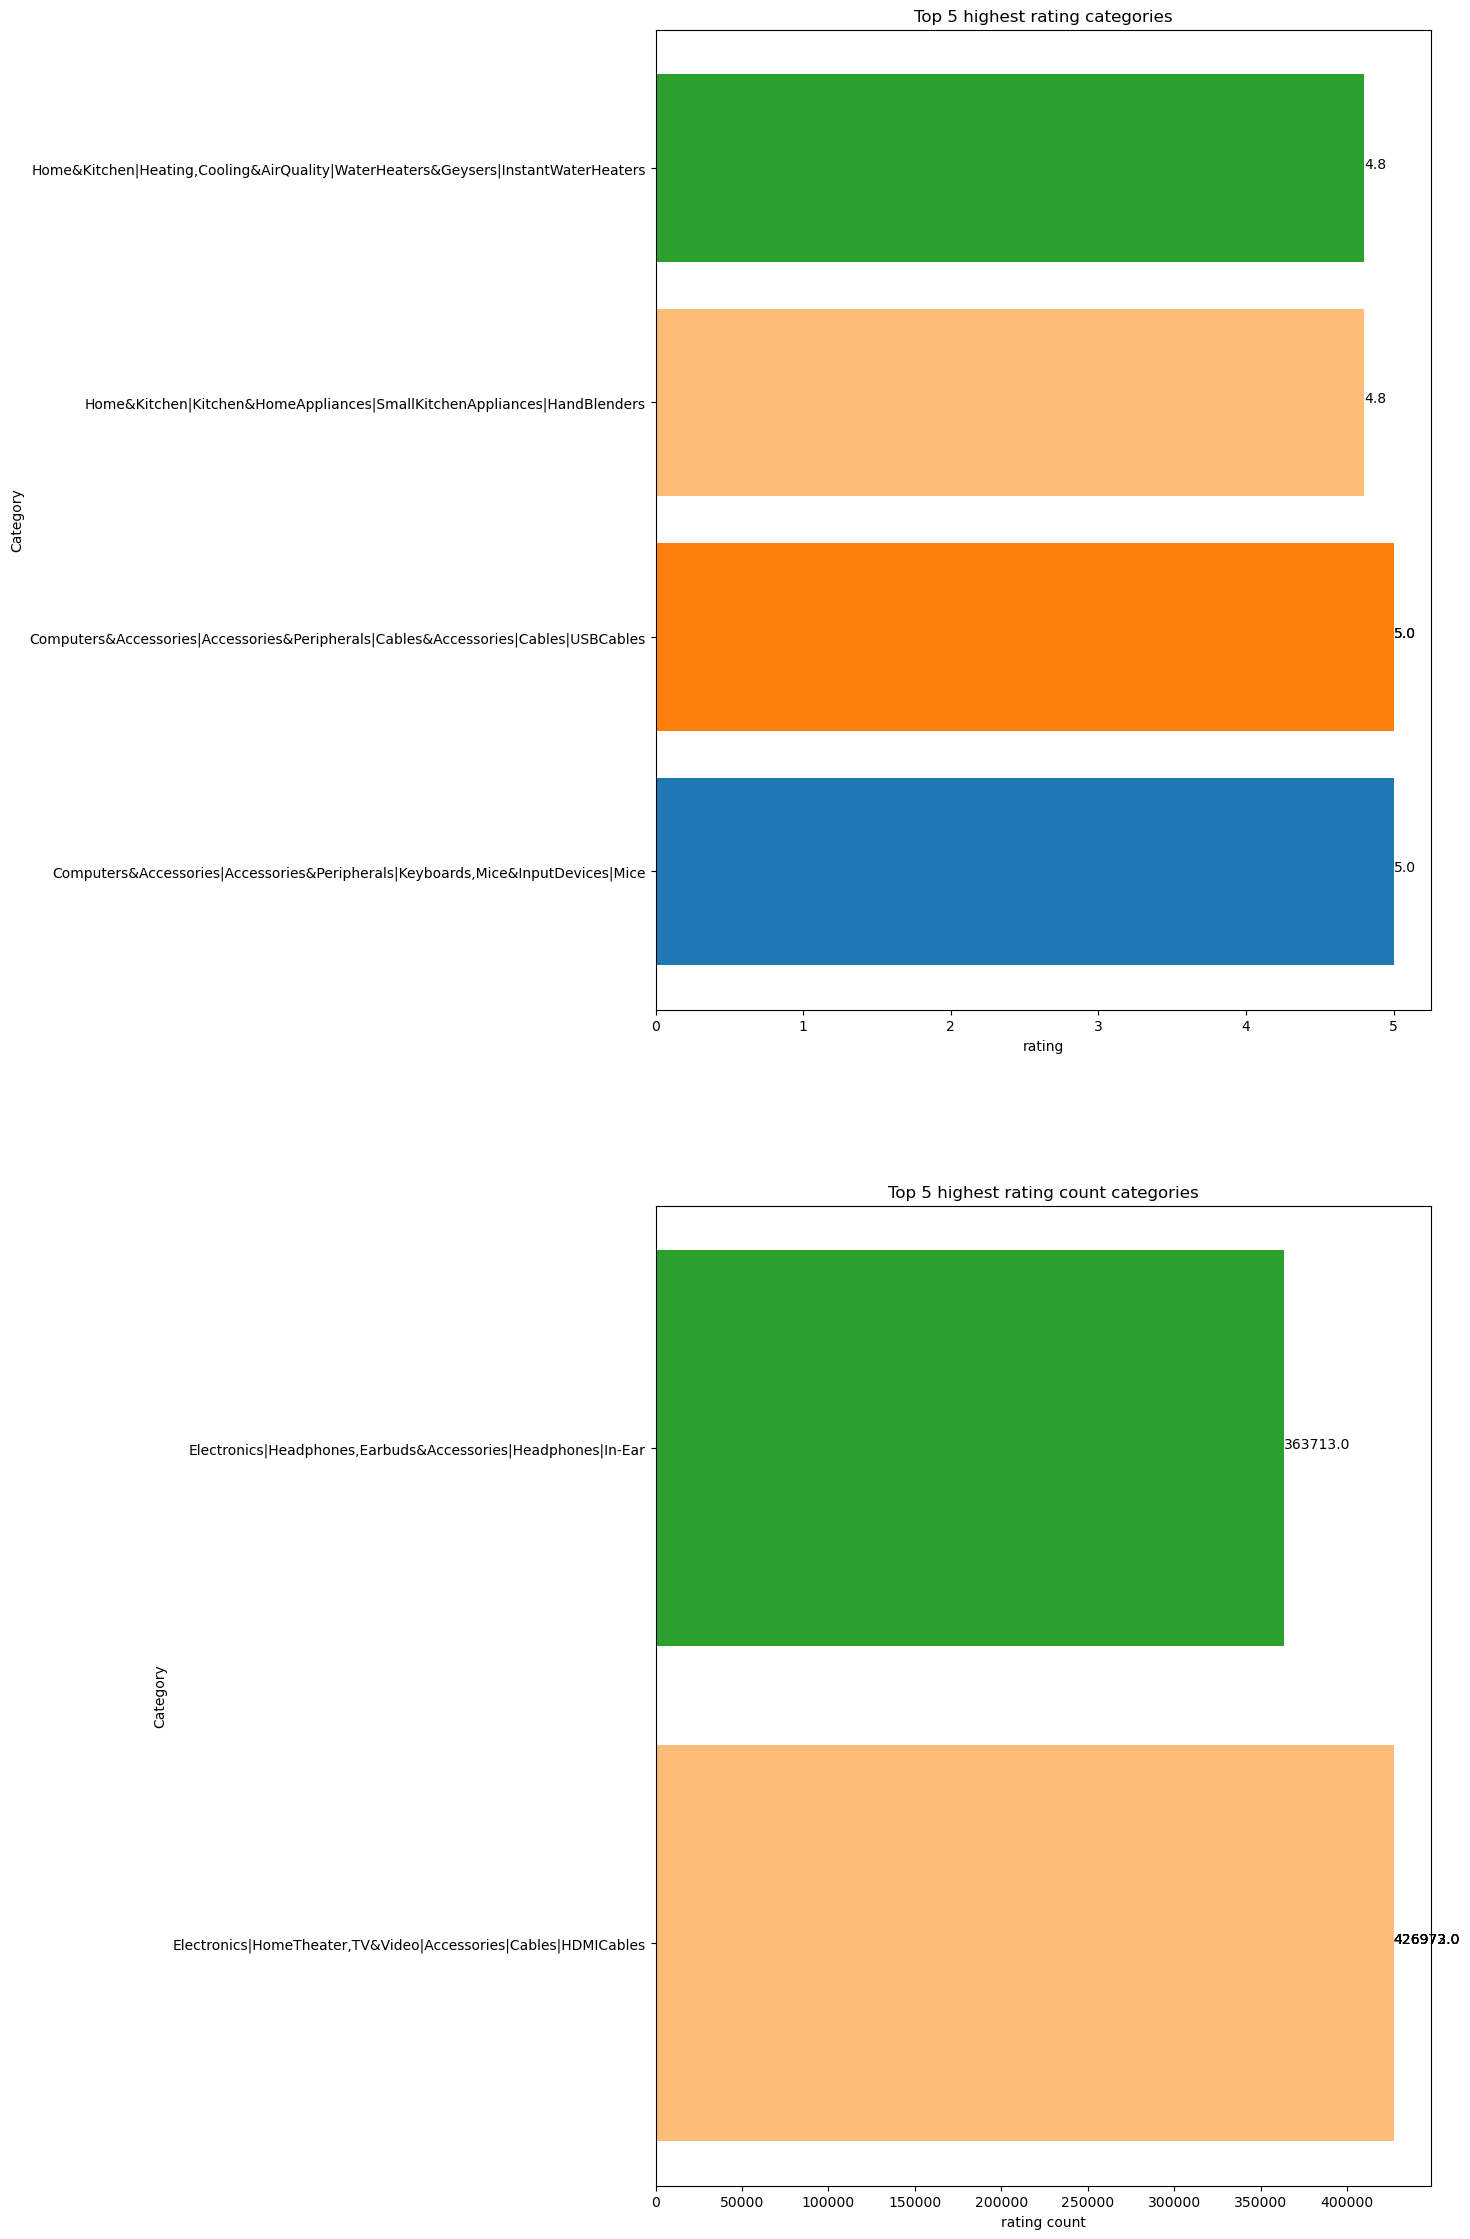

In [323]:
fig, axs = plt.subplots(2,1,figsize=(10,28))
col_map = plt.get_cmap('tab20')
axs[0].barh(max_rate['category'], max_rate['rating'], color=col_map.colors)
axs[0].set_title('Top 5 highest rating categories')
axs[0].set_xlabel('rating')
axs[0].set_ylabel('Category')
for i in range(len(max_rate)):
    axs[0].text(max_rate['rating'].iloc[i], max_rate['category'].iloc[i], max_rate['rating'].iloc[i])

col_map = plt.get_cmap('tab20')
axs[1].barh(max_rate_count['category'], max_rate_count['rating_count'], color=col_map.colors)
axs[1].set_title('Top 5 highest rating count categories')
axs[1].set_xlabel('rating count')
axs[1].set_ylabel('Category')
for i in range(len(max_rate_count)):
    axs[1].text(max_rate_count['rating_count'].iloc[i], max_rate_count['category'].iloc[i], max_rate_count['rating_count'].iloc[i])


plt.show()

**1.Top highest Rating by categories**
- The x-axis represents the rating, ranging from 0 to 5.
- The y-axis lists the categories.
- The most highest rating is 5.

**2.Top highest Rating count**
- The x-axis represent the rating count.
- The y-axis represent the categories.
- In this graph the gighest rating count is 426973.0

# Correlation 

# What is correlation ?
- Correlation refers to the relationship between two or more variables.
- It measure how changes in one variable are linked to the changes in another variable.
- It apply only numerical columns.

# Type of Correlation
**1.Positive correlation** :
- The value range is (0-1).it indicates two variables are positively correlated.i.e one variable is increase other variable is also increase or decrease.

**2.Negative correlation** :
- value range is(-1 to 0) . it indicates the two variable are negatively correlated. if one variable is increase the other variable is decrease.

**3.Zero / No correlation** :
- value range is 0. it indicates there is no relationship between variables.

                  discounted_price  actual_price  rating_count  final_price  \
discounted_price          1.000000      0.964146     -0.030616     0.781522   
actual_price              0.964146      1.000000     -0.039863     0.919061   
rating_count             -0.030616     -0.039863      1.000000    -0.048247   
final_price               0.781522      0.919061     -0.048247     1.000000   
rating                    0.122071      0.126618      0.106929     0.116380   

                    rating  
discounted_price  0.122071  
actual_price      0.126618  
rating_count      0.106929  
final_price       0.116380  
rating            1.000000  


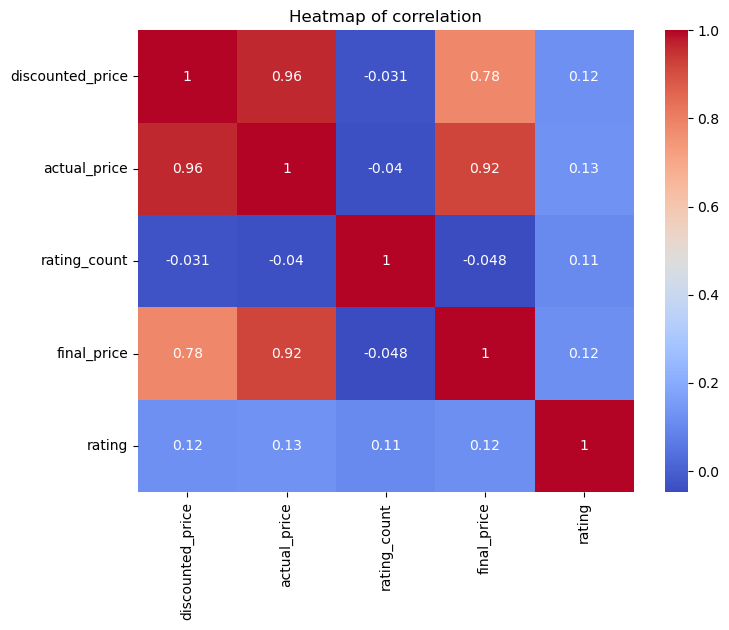

In [331]:
# correlation for discounted price,actual price,rating count,final price and rating
correlation=df[['discounted_price','actual_price','rating_count','final_price','rating']].corr() 
print(correlation)
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Heatmap of correlation')
plt.show()

- Every column is correlated to itself.
- Range scale is also shown .
- actual price and discounted price is strongly correlated.
- Then actual price and final price is also correlated.
- some features are negatively correlated.

In [335]:
df['product_name'].value_counts() # this shows the count of specific column

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                           5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                    4
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                                                                              3
Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating                  3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                    

In [343]:
avg_final_price=df.groupby('category')['final_price'].mean() # calculate average using mean()
print(avg_final_price)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    1661.00
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   2477.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            350.00
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                         675.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            650.50
                                                                                                                           ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|WireboundNotebooks                         8.75
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|

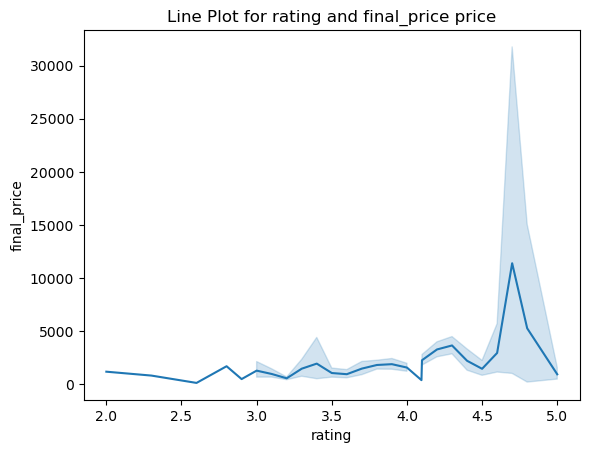

In [365]:
sns.lineplot(x='rating', y='final_price',data=df)
plt.title('Line Plot for rating and final_price price')
plt.show()


- The x-axis represents the rating, ranging from 2.0 to 5.0.
- The y-axis represents the final price, spanning from 0 to 30,000.
- The final price remains relatively stable between ratings of 2.0 and 4.0, with a slight increase observed between 3.5 and 4.0.
- The final price drops sharply after the peak at 4.6

# Recommendations

- Recommend products based on past user behavior and rating trends.
- Adjust discounts and visibility based on festivals, trends.
- Offer “Deal of the Day” based on slow-moving inventory or competitive categories.